In [ ]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [ ]:
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')

In [ ]:
if IN_COLAB:
    %cd /content/drive/MyDrive/dl

In [ ]:
if IN_COLAB:
    # Load the TensorBoard notebook extension
    %load_ext tensorboard

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import roc_curve, auc


For statistics later on

In [2]:
accuaracies = []
precisions = []
recalls = []
datasets = []

In [4]:
def mlp(inputs_train, inputs_val, labels_train, labels_val):
    

    learning_rate = .0001
    num_epochs = 50
    batch_size = 10
    input_shape = inputs_train.shape[1]
    print("input_shape: ", input_shape)
    
    # Let's design the model architecture.
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(input_shape), name="feature"),
        tf.keras.layers.Dense(512, activation='relu'),
        #tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'), 
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense((1), activation='sigmoid')
    ])

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
        # Loss function to minimize
        loss=keras.losses.BinaryCrossentropy(),
        #loss=keras.losses.BinaryFocalCrossentropy(),
        # List of metrics to monitor
        metrics=['AUC','accuracy', 'Recall', 'Precision'])


    model.summary()
    
    #Training the model.
    stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")

    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    history = model.fit(x=inputs_train,y=labels_train,
                            verbose=1,
                            validation_data=(inputs_val, labels_val), 
                            epochs=num_epochs, batch_size=batch_size, callbacks=[stopping_callback, tensorboard_callback])      
    
    save_filename = "saved_models/mlp.h5" 
    model.save(save_filename)      
    return model, history

In [5]:
tcga_df = pd.read_csv('my_full_data_v1.csv', index_col=0)
tcga_df.shape

(600, 19963)

In [7]:
input_data = tcga_df.iloc[:,:19962]
print(input_data.shape)
label_data = tcga_df.iloc[:,19962:]
print(label_data.shape)
inputs_training, inputs_test, labels_training, labels_test = train_test_split(input_data, label_data, test_size=0.1, shuffle=True)
inputs_train, inputs_val, labels_train, labels_val = train_test_split(inputs_training, labels_training, test_size=0.1, shuffle=True)
print("Length of inputs_train:", inputs_train.shape)
print("Length of labels_train:", labels_train.shape)
print("Length of inputs_val:", inputs_val.shape)
print("Length of labels_val:", labels_val.shape)
print("Length of inputs_test:", inputs_test.shape)
print("Length of labels_test:", labels_test.shape)

(600, 19962)
(600, 1)
Length of inputs_train: (486, 19962)
Length of labels_train: (486, 1)
Length of inputs_val: (54, 19962)
Length of labels_val: (54, 1)
Length of inputs_test: (60, 19962)
Length of labels_test: (60, 1)


Confirm that the label data split corectly

In [9]:
input_data.iloc[:,-1:]

,AP006621.6
gene_name,
f8a748c2-91e5-49a2-9095-229476dc9ce5,8
f4a76e18-60fa-4ef2-91ef-e2d7a1d11c8d,11
e3955555-9663-49da-bb98-f6593eb74d7f,4
de6f3bfe-6e91-4894-a826-67ebf147a6f0,9
dd012e44-f2ef-4bd4-92ac-7403ec383b6d,11
...,...
02f6c9d4-8296-4e00-9e78-4f4d8c942340,11
020a2284-03f3-4439-89bb-2292ebc3ecd2,48
01ebdef8-920f-4b71-8b44-512598962d6b,12


In [10]:
label_data

,label
gene_name,
f8a748c2-91e5-49a2-9095-229476dc9ce5,0
f4a76e18-60fa-4ef2-91ef-e2d7a1d11c8d,0
e3955555-9663-49da-bb98-f6593eb74d7f,0
de6f3bfe-6e91-4894-a826-67ebf147a6f0,0
dd012e44-f2ef-4bd4-92ac-7403ec383b6d,0
...,...
02f6c9d4-8296-4e00-9e78-4f4d8c942340,1
020a2284-03f3-4439-89bb-2292ebc3ecd2,1
01ebdef8-920f-4b71-8b44-512598962d6b,1


In [11]:
tcga_df.iloc[:,19961:]

,AP006621.6,label
gene_name,,
f8a748c2-91e5-49a2-9095-229476dc9ce5,8,0
f4a76e18-60fa-4ef2-91ef-e2d7a1d11c8d,11,0
e3955555-9663-49da-bb98-f6593eb74d7f,4,0
de6f3bfe-6e91-4894-a826-67ebf147a6f0,9,0
dd012e44-f2ef-4bd4-92ac-7403ec383b6d,11,0
...,...,...
02f6c9d4-8296-4e00-9e78-4f4d8c942340,11,1
020a2284-03f3-4439-89bb-2292ebc3ecd2,48,1
01ebdef8-920f-4b71-8b44-512598962d6b,12,1


In [12]:
tcga_cols = tcga_df.columns

In [13]:
model_mlp_all, history_mlp_all = mlp(inputs_train, inputs_val, labels_train, labels_val)

input_shape:  19962
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               10221056  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,393,601
Trainable params: 10,393,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
49/49 [======

In [14]:
evaluation_all = model_mlp_all.evaluate(inputs_test, labels_test, verbose=2)
evaluation_all

2/2 - 0s - loss: 0.0000e+00 - auc: 1.0000 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - 62ms/epoch - 31ms/step


[0.0, 1.0, 1.0, 1.0, 1.0]

In [17]:
accuaracies.append(round(evaluation_all[2]*100, 2))
precisions.append(round(evaluation_all[4]*100, 2))
recalls.append(round(evaluation_all[3]*100, 2))
datasets.append("All genes(=19963)")

In [19]:
labels_pred_all = model_mlp_all.predict(inputs_test).ravel()
fpr_all, tpr_all, thresholds_all = roc_curve(labels_test, labels_pred_all)

2/2 [==============================] - 0s 11ms/step


Let's take a prediction for a cancer sample

In [62]:
labels_test.head(25)

,label
gene_name,
aefc9460-27d4-4d7f-8167-baa2a80935b7,1
3e08ac76-9fba-40cf-8743-e2e1fb14f067,1
3369898e-21d8-4ded-8bbc-a746b1a743ad,1
98a4b8cc-fd54-454c-adcd-6fe9ae159a3b,1
6a8d149a-963f-4e36-a031-aef7b057452b,0
52e52b5d-4112-4616-8ddd-2a4524a91778,1
7643fc1a-086e-4ea5-9766-3dde13cc00b4,1
da52147d-9bd6-449c-b5d9-b168822ddac0,1
0a11e8dc-5d34-4fcb-b2dc-aa57b4e90fc9,1


In [72]:
# take the Name of the output (normal 4,18)
test_row = inputs_test.iloc[7]
test_row

TSPAN6        2101
TNMD             0
DPM1          1078
SCYL3          750
C1orf112       237
              ... 
AL451106.1       0
AC008763.4       0
AC006486.3       0
AL391628.1      11
AP006621.6       8
Name: da52147d-9bd6-449c-b5d9-b168822ddac0, Length: 19962, dtype: int64

In [73]:
test_row = test_row.to_frame()
test_row.shape

(19962, 1)

In [74]:
pred = model_mlp_all.predict(test_row.T)
pred

1/1 [==============================] - 0s 30ms/step


array([[1.]], dtype=float32)

In [75]:
icgc_df = pd.read_csv('icgc_train_data_v2.csv', index_col=0)
icgc_df.shape

(543, 20502)

In [76]:
icgc_df.head(5)


,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR,label
submitted_sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-05-4244-01A-01R-1107-07,74.0,0.0,5.0,388.0,28202.0,1.0,375.0,3.0,0.0,1865.0,...,838.0,2748.0,2.0,3117.0,8130.0,2496.0,1648.0,19.0,0.0,1
TCGA-05-4249-01A-01R-1107-07,373.0,1.0,5.0,276.0,79863.0,5.0,1797.0,2.0,1.0,1877.0,...,1533.0,3663.0,63.0,2446.0,7303.0,3535.0,2144.0,559.0,0.0,1
TCGA-05-4250-01A-01R-1107-07,153.0,0.0,0.0,455.0,51097.0,0.0,1075.0,3.0,4.0,1775.0,...,1102.0,2545.0,80.0,1433.0,16398.0,3530.0,1607.0,19.0,0.0,1
TCGA-05-4382-01A-01R-1206-07,609.0,0.0,0.0,468.0,97475.0,20.0,2317.0,9.0,6.0,2542.0,...,1449.0,3956.0,271.0,3795.0,28291.0,4886.0,2774.0,147.0,0.0,1
TCGA-05-4384-01A-01R-1755-07,208.0,0.0,0.0,143.0,79090.0,0.0,250.0,3.0,0.0,1090.0,...,922.0,2162.0,13.0,1275.0,5470.0,2844.0,1184.0,619.0,0.0,1


In [77]:
len(icgc_df[icgc_df["label"]==1])

488

In [78]:
len(icgc_df[icgc_df["label"]==0])

55

In [81]:
icgc_cols = icgc_df.columns

In [82]:
tcga_cols

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'AC119733.1', 'AC020765.6', 'AC010980.1', 'AC004233.4', 'AL451106.1',
       'AC008763.4', 'AC006486.3', 'AL391628.1', 'AP006621.6', 'label'],
      dtype='object', length=19963)

In [83]:
icgc_cols

Index(['A1BG', 'A1CF', 'A2BP1', 'A2LD1', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT',
       'AAA1', 'AAAS',
       ...
       'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3', 'psiTPTE22',
       'tAKR', 'label'],
      dtype='object', length=20502)

In [84]:
np.array_equal(icgc_cols,tcga_cols)

False

In [85]:
common_genes = np.intersect1d(icgc_cols,tcga_cols)
len(common_genes)

16598

In [86]:
common_genes

array(['A1BG', 'A1CF', 'A2M', ..., 'ZZEF1', 'ZZZ3', 'label'], dtype=object)

In [87]:
icgc_common_df = icgc_df[common_genes]

In [88]:
icgc_common_df.shape


(543, 16598)

In [89]:
tcga_common_df = tcga_df[common_genes]
tcga_common_df.shape


(600, 16598)

In [90]:
tcga_common_df.columns

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AADAC', 'AADACL2',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'label'],
      dtype='object', length=16598)

In [91]:
icgc_common_df.columns

Index(['A1BG', 'A1CF', 'A2M', 'A2ML1', 'A4GALT', 'A4GNT', 'AAAS', 'AACS',
       'AADAC', 'AADACL2',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'label'],
      dtype='object', length=16598)

In [ ]:
# Check whether tcga_common_df and icgc_common_df contain any similar rows

In [92]:
test_icgc_df = icgc_common_df.reset_index(drop=True)
test_icgc_df = test_icgc_df.drop(['label'], axis=1)
print(test_icgc_df.head(1))
test_icgc_df.shape

   A1BG  A1CF      A2M  A2ML1  A4GALT  A4GNT    AAAS    AACS  AADAC  AADACL2  \
0  74.0   0.0  28202.0    1.0   375.0    3.0  1865.0  2302.0   10.0      2.0   

   ...  ZWILCH   ZWINT   ZXDA   ZXDB    ZXDC  ZYG11A  ZYG11B     ZYX   ZZEF1  \
0  ...   633.0  1483.0  114.0  838.0  2748.0     2.0  3117.0  8130.0  2496.0   

     ZZZ3  
0  1648.0  

[1 rows x 16597 columns]


(543, 16597)

In [93]:
test_tcga_df = tcga_common_df.reset_index(drop=True)
test_tcga_df = test_tcga_df.drop(['label'], axis=1)
print(test_tcga_df.head(1))
test_tcga_df.shape

   A1BG  A1CF    A2M  A2ML1  A4GALT  A4GNT  AAAS  AACS  AADAC  AADACL2  ...  \
0     4     0  77182      9     525      9   959   804     94        1  ...   

   ZWILCH  ZWINT  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B   ZYX  ZZEF1  ZZZ3  
0     190    181   134   453  1156       1    1257  6258   2788   891  

[1 rows x 16597 columns]


(600, 16597)

In [94]:
df_diff = pd.concat([test_tcga_df,test_icgc_df]).drop_duplicates(keep=False)
df_diff.shape

(1143, 16597)

In [ ]:
# Good!
#  tcga_common_df and icgc_common_df does totally different 
# icgc_common can be used as unknown data!

In [95]:
input_data = tcga_common_df.iloc[:,:16597]
print(input_data.shape)
label_data = tcga_common_df.iloc[:,16597:]
print(label_data.shape)
inputs_training, inputs_test, labels_training, labels_test = train_test_split(input_data, label_data, test_size=0.1, shuffle=True)
inputs_train, inputs_val, labels_train, labels_val = train_test_split(inputs_training, labels_training, test_size=0.1, shuffle=True)
print("Length of inputs_train:", inputs_train.shape)
print("Length of labels_train:", labels_train.shape)
print("Length of inputs_val:", inputs_val.shape)
print("Length of labels_val:", labels_val.shape)
print("Length of inputs_test:", inputs_test.shape)
print("Length of labels_test:", labels_test.shape)

(600, 16597)
(600, 1)
Length of inputs_train: (486, 16597)
Length of labels_train: (486, 1)
Length of inputs_val: (54, 16597)
Length of labels_val: (54, 1)
Length of inputs_test: (60, 16597)
Length of labels_test: (60, 1)


In [96]:
model_mlp_16597, history_mlp_16597 = mlp(inputs_train, inputs_val, labels_train, labels_val)

input_shape:  16597
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               8498176   
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,670,721
Trainable params: 8,670,721
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
49/49 [======

In [97]:
evaluation_16597 = model_mlp_16597.evaluate(inputs_test, labels_test, verbose=2)
evaluation_16597

2/2 - 0s - loss: 47.4586 - auc: 0.8750 - accuracy: 0.9667 - recall: 1.0000 - precision: 0.9630 - 49ms/epoch - 25ms/step


[47.458560943603516, 0.875, 0.9666666388511658, 1.0, 0.9629629850387573]

In [98]:
accuaracies.append(round(evaluation_16597[2]*100, 2))
precisions.append(round(evaluation_16597[4]*100, 2))
recalls.append(round(evaluation_16597[3]*100, 2))
datasets.append("Common genes (=16598)")

In [99]:
labels_pred_16597 = model_mlp_16597.predict(inputs_test).ravel()
fpr_16597, tpr_16597, thresholds_16597 = roc_curve(labels_test, labels_pred_16597)

2/2 [==============================] - 0s 10ms/step


In [100]:
icgc_input_data = icgc_common_df.iloc[:,:16597]
print(icgc_input_data.shape)
icgc_label_data = icgc_common_df.iloc[:,16597:]
print(icgc_label_data.shape)

(543, 16597)
(543, 1)


In [101]:
icgc_input_data.iloc[:,-1:]

,ZZZ3
submitted_sample_id,
TCGA-05-4244-01A-01R-1107-07,1648.0
TCGA-05-4249-01A-01R-1107-07,2144.0
TCGA-05-4250-01A-01R-1107-07,1607.0
TCGA-05-4382-01A-01R-1206-07,2774.0
TCGA-05-4384-01A-01R-1755-07,1184.0
...,...
TCGA-MP-A4TJ-01A-51R-A262-07,688.0
TCGA-MP-A4TK-01A-11R-A24X-07,1034.0
TCGA-MP-A5C7-01A-11R-A262-07,2035.0


In [102]:
icgc_common_df.iloc[:,16596:]

,ZZZ3,label
submitted_sample_id,,
TCGA-05-4244-01A-01R-1107-07,1648.0,1
TCGA-05-4249-01A-01R-1107-07,2144.0,1
TCGA-05-4250-01A-01R-1107-07,1607.0,1
TCGA-05-4382-01A-01R-1206-07,2774.0,1
TCGA-05-4384-01A-01R-1755-07,1184.0,1
...,...,...
TCGA-MP-A4TJ-01A-51R-A262-07,688.0,1
TCGA-MP-A4TK-01A-11R-A24X-07,1034.0,1
TCGA-MP-A5C7-01A-11R-A262-07,2035.0,1


In [103]:
icgc_label_data

,label
submitted_sample_id,
TCGA-05-4244-01A-01R-1107-07,1
TCGA-05-4249-01A-01R-1107-07,1
TCGA-05-4250-01A-01R-1107-07,1
TCGA-05-4382-01A-01R-1206-07,1
TCGA-05-4384-01A-01R-1755-07,1
...,...
TCGA-MP-A4TJ-01A-51R-A262-07,1
TCGA-MP-A4TK-01A-11R-A24X-07,1
TCGA-MP-A5C7-01A-11R-A262-07,1


In [104]:
len(icgc_common_df[icgc_common_df["label"]==1])

488

In [105]:
evaluation_icgc = model_mlp_16597.evaluate(icgc_input_data, icgc_label_data, verbose=2)
evaluation_icgc

17/17 - 0s - loss: 130.9632 - auc: 0.7727 - accuracy: 0.9540 - recall: 1.0000 - precision: 0.9513 - 398ms/epoch - 23ms/step


[130.96324157714844,
 0.7727272510528564,
 0.9539594650268555,
 1.0,
 0.9512670636177063]

In [106]:
accuaracies.append(round(evaluation_icgc[2]*100, 2))
precisions.append(round(evaluation_icgc[4]*100, 2))
recalls.append(round(evaluation_icgc[3]*100, 2))
datasets.append("Common genes evaluate with icgc data")

In [107]:
labels_pred_icgc = model_mlp_16597.predict(icgc_input_data).ravel()
fpr_icgc, tpr_icgc, thresholds_16597 = roc_curve(icgc_label_data, labels_pred_icgc)

17/17 [==============================] - 0s 11ms/step


In [108]:
results = {
    "Feature Type": datasets,
    "Precision (%)": precisions,
    "Recall (%)": recalls,
    "Accuracy (%)": accuaracies,
}

#load data into a DataFrame object:
results_df = pd.DataFrame(results)
results_df

,Feature Type,Precision (%),Recall (%),Accuracy (%)
0,All genes(=19963),100.00,100.0,100.00
1,All genes(=19963),100.00,100.0,100.00
2,Common genes (=16598),96.30,100.0,96.67
3,Common genes evaluate with icgc data,95.13,100.0,95.40


In [109]:
def get_ff(model_name):
    if model_name == 'all':
        return fpr_all, tpr_all
    if model_name == 'common-tcga':
        return fpr_16597, tpr_16597
    if model_name == 'common-icgc':
        return fpr_icgc, tpr_icgc


C:\Users\mtheo\AppData\Local\Temp\ipykernel_54132\2641346188.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


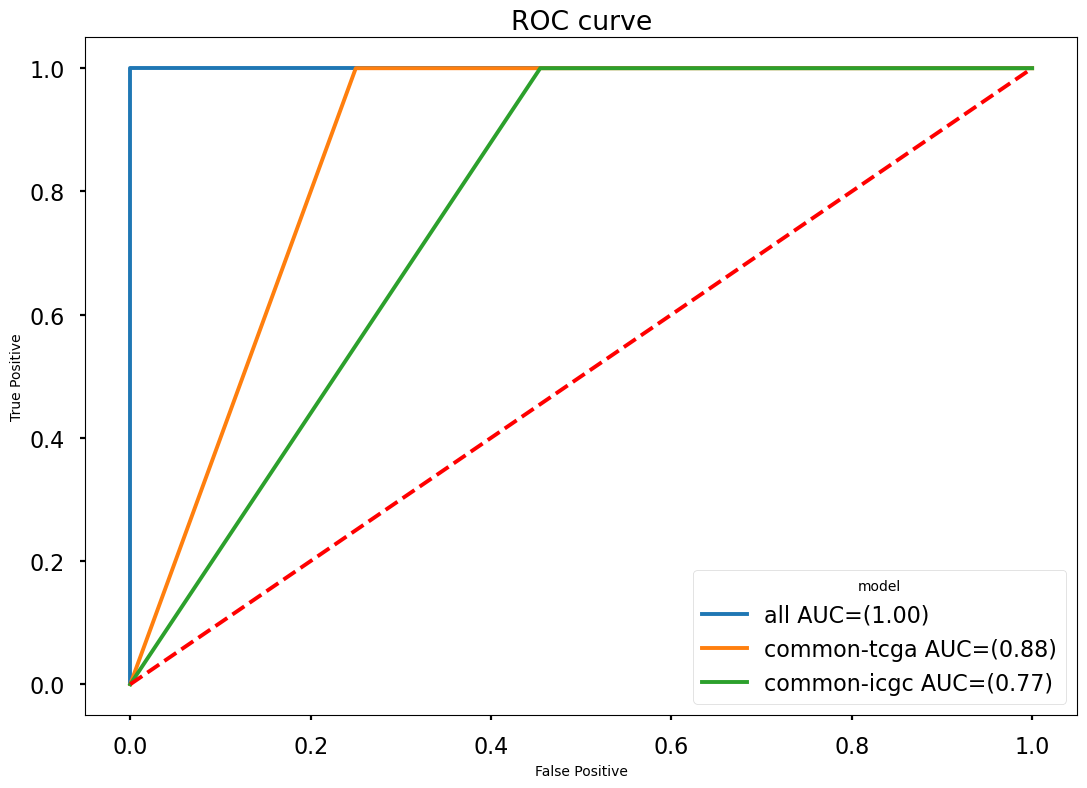

In [110]:
plt.style.use('seaborn-poster')
with plt.style.context(['seaborn-poster']):
    fig, ax = plt.subplots()        
    for p in ['all', 'common-tcga','common-icgc']: 
        fpr, tpr = get_ff(p)
        roc_auc=auc(fpr, tpr)
        ax.plot(fpr, tpr, label='%s AUC=(%.2f)' %(p, roc_auc)) 
    ax.plot([0,1],[0,1],'r--')
    ax.legend(loc='lower right') 
    ax.legend(title='model')       
    ax.set(xlabel='False Positive')        
    ax.set(ylabel='True Positive')
    plt.title('ROC curve')
    #ax.autoscale(tight=True)        
    #fig.savefig('fig1.pdf')        
    fig.savefig('tcga-roc-curve.jpg', dpi=300)

In [ ]:
if IN_COLAB:
    %tensorboard --logdir logs/fit